In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Data

In [63]:
df = pd.read_excel('cardio_train.xlsx')

# Menghapus data yang tidak diperlukan.
df = df.drop('CLASS cardio', axis=1)

# Mengubah kolom 'age' dari hitungan hari menjadi tahun.
df['age'] = df['age'] // 365
df

,id,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
0,0,50,2,168,62.0,1,1,0,0,1
1,1,55,1,156,85.0,3,1,0,0,1
2,2,51,1,165,64.0,3,1,0,0,0
3,3,48,2,169,82.0,1,1,0,0,1
4,4,47,1,156,56.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,1,1,1,0,1
69996,99995,61,1,158,126.0,2,2,0,0,1
69997,99996,52,2,183,105.0,3,1,0,1,0
69998,99998,61,1,163,72.0,1,2,0,0,0


### Memeriksa data yang bernilai null

In [46]:
missing_value = df.isnull()
for column in missing_value.columns.values.tolist():
    print(column)
    print(missing_value[column].value_counts())
    print('')

id
id
False    70000
Name: count, dtype: int64

age
age
False    70000
Name: count, dtype: int64

gender
gender
False    70000
Name: count, dtype: int64

height
height
False    70000
Name: count, dtype: int64

weight
weight
False    70000
Name: count, dtype: int64

cholesterol
cholesterol
False    70000
Name: count, dtype: int64

gluc
gluc
False    70000
Name: count, dtype: int64

smoke
smoke
False    70000
Name: count, dtype: int64

alco
alco
False    70000
Name: count, dtype: int64

active
active
False    70000
Name: count, dtype: int64



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.3 MB


### Memeriksa korelasi yang tepat

<Axes: >

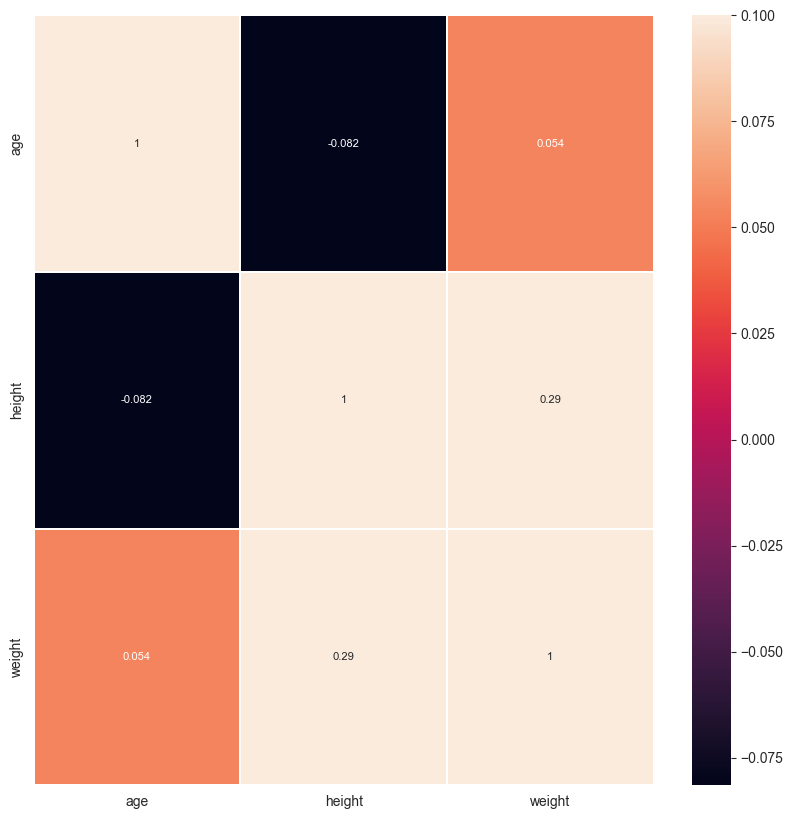

In [48]:
df_korelasi = df[['age','height','weight']].corr()
sns.set({'figure.figsize':(10,10)})
sns.heatmap(df_korelasi, linewidths=.05, vmax=0.1, annot=True, annot_kws={'fontsize':8})

Berdasarkan korelasi di atas, korelasi tertinggi hubungan antara height dengan weight.

In [49]:
x = 'height'
y = 'weight'
df = df.loc[:,[x,y]]
df

,height,weight
0,168,62.0
1,156,85.0
2,165,64.0
3,169,82.0
4,156,56.0
...,...,...
69995,168,76.0
69996,158,126.0
69997,183,105.0
69998,163,72.0


In [68]:
# Normalisasi data height dan weight agar kedua nilai memiliki range yang tidak terlalu jauh. Sehingga, dapat memudahkan peritungan.
normalisasi = (df - df.min()) / (df.max() - df.min())
df = normalisasi
df

,id,age,gender,height,weight,cholesterol,gluc,smoke,alco,active
0,0.00000,0.600000,1.0,0.579487,0.273684,0.0,0.0,0.0,0.0,1.0
1,0.00001,0.742857,0.0,0.517949,0.394737,1.0,0.0,0.0,0.0,1.0
2,0.00002,0.628571,0.0,0.564103,0.284211,1.0,0.0,0.0,0.0,0.0
3,0.00003,0.542857,1.0,0.584615,0.378947,0.0,0.0,0.0,0.0,1.0
4,0.00004,0.514286,0.0,0.517949,0.242105,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
69995,0.99994,0.657143,1.0,0.579487,0.347368,0.0,0.0,1.0,0.0,1.0
69996,0.99996,0.914286,0.0,0.528205,0.610526,0.5,0.5,0.0,0.0,1.0
69997,0.99997,0.657143,1.0,0.656410,0.500000,1.0,0.0,0.0,1.0,0.0
69998,0.99999,0.914286,0.0,0.553846,0.326316,0.0,0.5,0.0,0.0,0.0


Text(0, 0.5, 'weight')

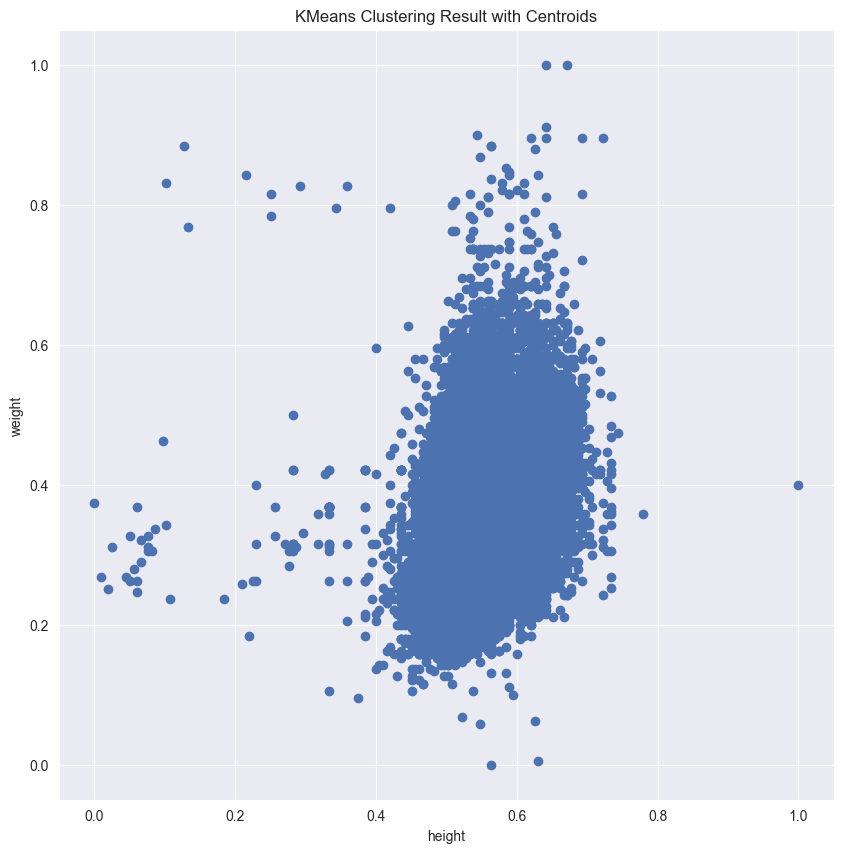

In [69]:
plt.scatter(df[x], df[y])
plt.title('KMeans Clustering Result with Centroids')
plt.xlabel(x)
plt.ylabel(y)


# Inisialisasi Centroid

In [67]:
import random

# Rumus Inisialisasi Centroid
def inisialisasi_centroid(df, x, y, k):
    random.seed(10)
    centroid = {i + 1 : [random.choices(df[x]), random.choices(df[y])] for i in range(k)}
    return centroid

[[0.5794871794871795], [0.2631578947368421]]
[[0.5794871794871795], [0.38421052631578945]]


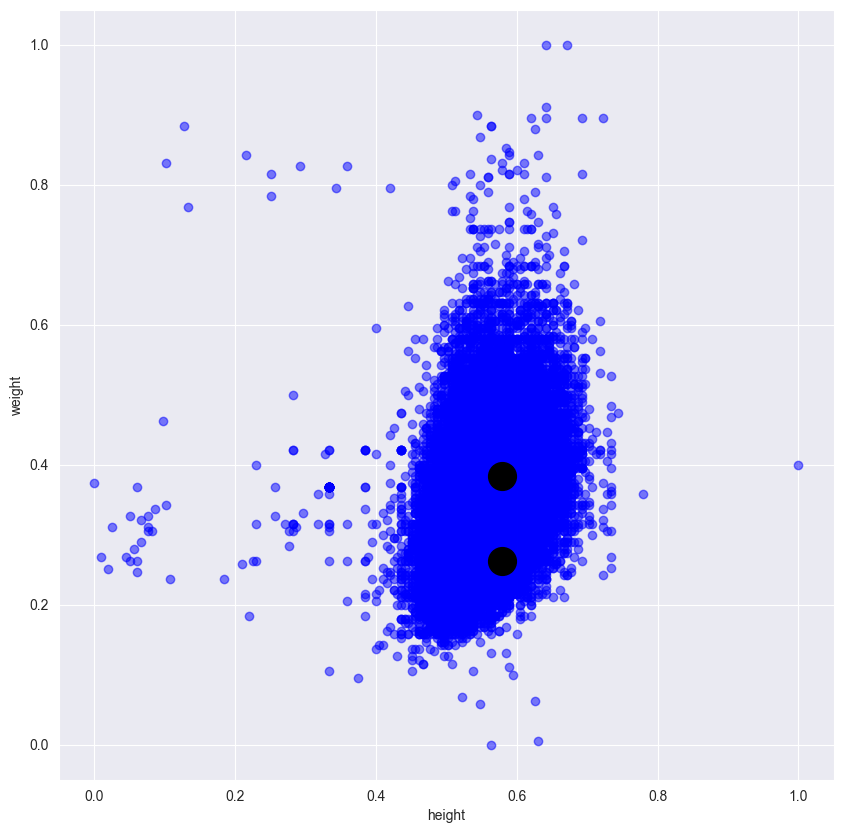

In [72]:
k = 2
centro = inisialisasi_centroid(df,x ,y ,k)
for i in centro:
    print(centro[i])
    
plt.scatter(df[x], df[y], color='blue', alpha=0.5)

for i in centro:
    plt.scatter(centro[i][0], centro[i][1], color='black', s=400)
    
plt.xlabel(x)
plt.ylabel(y)
    
plt.show()

In [73]:
# Rumus Menghitung Jarak Setiap Data Ke Setiap Centroid

def jarak_euclid(df,x,y,centroid2):
    for i in centroid2.keys():
        df[str(i)] = np.sqrt(((df[x] - centroid2[i][0]) * (df[x] - centroid2[i][0])) + ((df[y] - centroid2[i][1]) * (df[y] - centroid2[i][1])))
    return df

In [55]:
df_euc = jarak_euclid(df,x,y,centro)
df_euc

,height,weight,1,2
0,0.579487,0.273684,0.010526,0.110526
1,0.517949,0.394737,0.145258,0.062432
2,0.564103,0.284211,0.026075,0.101177
3,0.584615,0.378947,0.115903,0.007348
4,0.517949,0.242105,0.065040,0.154858
...,...,...,...,...
69995,0.579487,0.347368,0.084211,0.036842
69996,0.528205,0.610526,0.351133,0.232053
69997,0.656410,0.500000,0.249021,0.139012
69998,0.553846,0.326316,0.068164,0.063319


In [74]:
colmap = {
    1:'green',
    2:'red'
}

# Rumus Untuk Menentukan Cluster Setiap Data
def cluster_baru(df, centroid2):
    df['Cluster'] = (df.loc[:, ['{}'.format(i) for i in centroid2.keys()]].idxmin(axis=1)).astype('int')
    df['color'] = df['Cluster'].map(lambda x: colmap.get(x, 'black'))
    return df

In [75]:
df_euc = cluster_baru(df_euc, centro)
df_euc

,height,weight,1,2,Cluster,color
0,0.579487,0.273684,0.034498,0.144477,1,green
1,0.517949,0.394737,0.105947,0.063779,2,red
2,0.564103,0.284211,0.015894,0.134580,1,green
3,0.584615,0.378947,0.090691,0.039878,2,red
4,0.517949,0.242105,0.062313,0.185768,1,green
...,...,...,...,...,...,...
69995,0.579487,0.347368,0.059758,0.070811,1,green
69996,0.528205,0.610526,0.317041,0.198542,2,red
69997,0.656410,0.500000,0.230673,0.113853,2,red
69998,0.553846,0.326316,0.032006,0.094771,1,green


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


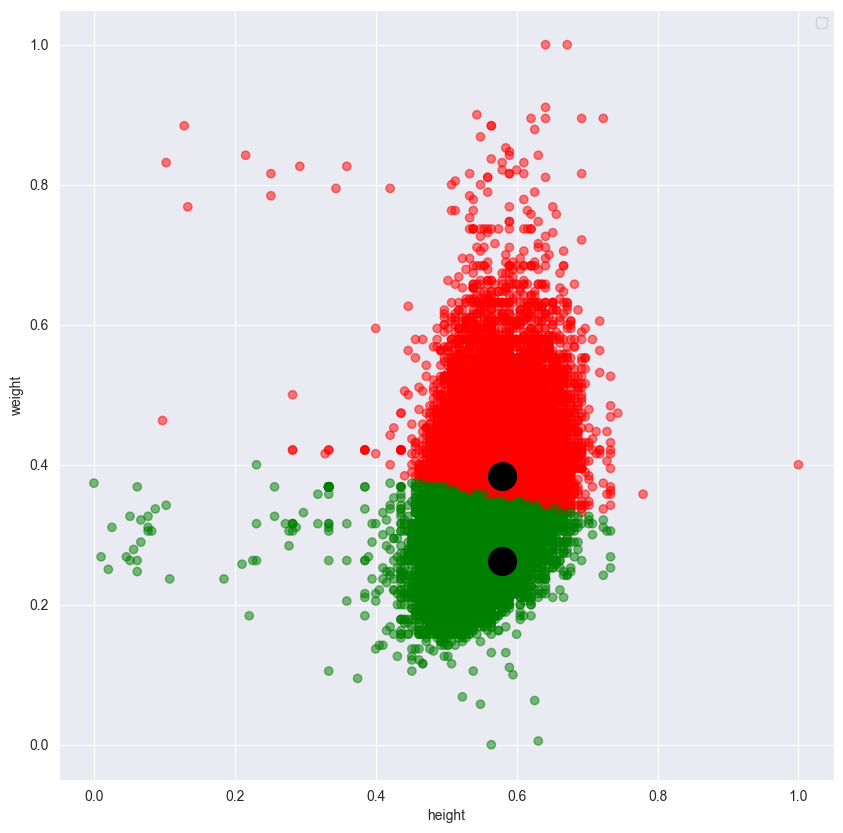

In [77]:
plt.scatter(df_euc[x], df_euc[y], alpha=0.5, c=df_euc['color'])
for i in centro:
    plt.scatter(centro[i][0], centro[i][1], color='black', s=400)
    
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
    
plt.show()

# Menentukan Centroid Baru

In [59]:
def centroid_baru(df, centroid2):
    for i in centroid2.keys():
        centroid2[i][0] = np.mean(df[df['Cluster'] == i][x])
        centroid2[i][1] = np.mean(df[df['Cluster'] == i][y])
    return centroid2

In [60]:
def clusterisasi(df,x,y,k):
    centroid2 = inisialisasi_centroid(df,x,y,k)
    df_euc = copy.deepcopy(df)
    df_euc = jarak_euclid(df_euc,x,y,centroid2)
    df_euc = cluster_baru(df_euc, centroid2)
    centroid2 = centroid_baru(df_euc, centroid2)
    
    while(True):
        centroid_lama = copy.deepcopy(centroid2)
        df_euc = jarak_euclid(df_euc,x,y,centroid2)
        df_euc = cluster_baru(df_euc, centroid2)
        centroid2 = centroid_baru(df_euc, centroid2)
        if(centroid_lama == centroid2):
            break
        
    return (df_euc, centroid2)

# Tes Clusterisasi K=2

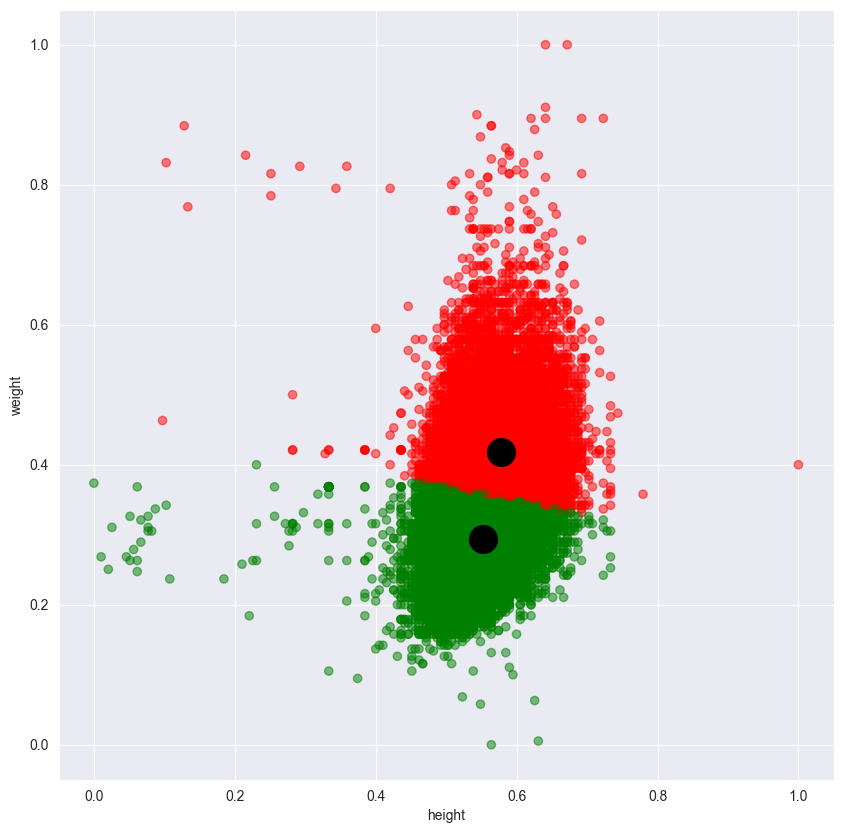

In [61]:
k = 2

df_euc, centroid2 = clusterisasi(df,x,y,k)

plt.scatter(df_euc[x], df_euc[y], c=df_euc['color'], alpha=0.5)
for i in centroid2:
    plt.scatter(*centroid2[i], color='black', s=400)

plt.xlabel(x)
plt.ylabel(y)

plt.show()